In [1]:
import pandas as pd
from mplsoccer import VerticalPitch, Pitch
from statsbombpy import sb
import matplotlib.pyplot as plt

In [14]:
#trae los eventos del partido
#partido = sb.events(match_id=3869151)
#te da la tabla del partido
#partido.head()

sb.matches(competition_id=43, season_id=106).sort_values(by='match_date')

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
35,3857286,2022-11-20,18:00:00.000,International - FIFA World Cup,2022,Qatar,Ecuador,0,2,available,...,2023-07-25T07:19:21.209321,1,Group Stage,Al Bayt Stadium,Daniele Orsato,Félix Sánchez Bas,Gustavo Julio Alfaro,1.1.0,2,2
57,3857271,2022-11-21,15:00:00.000,International - FIFA World Cup,2022,England,Iran,6,2,available,...,2023-06-18T15:37:14.539174,1,Group Stage,Sheikh Khalifa International Stadium,Raphael Claus,Gareth Southgate,Carlos Manuel Brito Leal Queiróz,1.1.0,2,2
46,3857285,2022-11-21,18:00:00.000,International - FIFA World Cup,2022,Senegal,Netherlands,0,2,available,...,2023-06-20T10:37:16.264240,1,Group Stage,Al Thumama Stadium,Wilton Pereira Sampaio,Aliou Cissé,Louis van Gaal,1.1.0,2,2
34,3857282,2022-11-21,21:00:00.000,International - FIFA World Cup,2022,United States,Wales,1,1,available,...,2023-07-25T09:10:59.976019,1,Group Stage,Ahmad bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,Gregg Berhalter,Robert Page,1.1.0,2,2
63,3857254,2022-11-22,15:00:00.000,International - FIFA World Cup,2022,Denmark,Tunisia,0,0,available,...,2023-07-29T19:44:56.738444,1,Group Stage,Education City Stadium,César Arturo Ramos Palazuelos,Kasper Hjulmand,Jalel Kadri,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,3869486,2022-12-10,17:00:00.000,International - FIFA World Cup,2022,Morocco,Portugal,1,0,available,...,2023-04-26T23:03:02.645780,5,Quarter-finals,Al Thumama Stadium,Facundo Tello Figueroa,Hoalid Regragui,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
19,3869519,2022-12-13,21:00:00.000,International - FIFA World Cup,2022,Argentina,Croatia,3,0,available,...,2023-04-26T22:32:37.808359,6,Semi-finals,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Zlatko Dalić,1.1.0,2,2
21,3869552,2022-12-14,21:00:00.000,International - FIFA World Cup,2022,France,Morocco,2,0,available,...,2023-04-26T22:30:45.010084,6,Semi-finals,Al Bayt Stadium,César Arturo Ramos Palazuelos,Didier Deschamps,Hoalid Regragui,1.1.0,2,2
18,3869684,2022-12-17,17:00:00.000,International - FIFA World Cup,2022,Croatia,Morocco,2,1,available,...,2023-04-26T22:18:59.308194,7,3rd Place Final,Sheikh Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Zlatko Dalić,Hoalid Regragui,1.1.0,2,2


In [15]:
partido = sb.events(match_id=3869685)
partido.player.value_counts()

player
Enzo Fernandez                     328
Rodrigo Javier De Paul             242
Lionel Andrés Messi Cuccittini     242
Nicolás Hernán Otamendi            215
Jules Koundé                       211
Aurélien Djani Tchouaméni          205
Cristian Gabriel Romero            203
Dayotchanculle Upamecano           198
Alexis Mac Allister                196
Raphaël Varane                     182
Adrien Rabiot                      176
Nicolás Alejandro Tagliafico       165
Julián Álvarez                     150
Kylian Mbappé Lottin               149
Theo Bernard François Hernández    145
Nahuel Molina Lucero               142
Ángel Fabián Di María Hernández    132
Randal Kolo Muani                  127
Marcus Thuram                      119
Marcos Javier Acuña                112
Antoine Griezmann                  103
Hugo Lloris                         97
Kingsley Coman                      85
Damián Emiliano Martínez            83
Eduardo Camavinga                   83
Gonzalo Ariel Mont

In [25]:
jugador = partido[partido['player'] == 'Nicolás Hernán Otamendi']

In [26]:
jugador[['x','y']] = jugador['location'].apply(pd.Series)

C:\Users\Juan\AppData\Local\Temp\ipykernel_9064\378237732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jugador[['x','y']] = jugador['location'].apply(pd.Series)
C:\Users\Juan\AppData\Local\Temp\ipykernel_9064\378237732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jugador[['x','y']] = jugador['location'].apply(pd.Series)


In [28]:
partido.shot_type.value_counts()

shot_type
Open Play    27
Penalty      11
Name: count, dtype: int64

In [39]:
pases = jugador[jugador['type'] == 'Pass']
pases[['x', 'y']] = pases.location.apply(pd.Series)
pases[['end_x', 'end_y']] = pases.pass_end_location.apply(pd.Series)
pases[['x','y','end_x', 'end_y']]

C:\Users\Juan\AppData\Local\Temp\ipykernel_9064\3950511136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases[['x', 'y']] = pases.location.apply(pd.Series)
C:\Users\Juan\AppData\Local\Temp\ipykernel_9064\3950511136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases[['end_x', 'end_y']] = pases.pass_end_location.apply(pd.Series)
C:\Users\Juan\AppData\Local\Temp\ipykernel_9064\3950511136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,x,y,end_x,end_y
17,24.0,27.1,21.7,49.3
19,21.7,24.5,26.6,3.1
22,21.7,17.7,19.7,33.3
24,29.8,29.2,27.0,45.9
26,24.7,29.0,5.6,42.3
...,...,...,...,...
1251,64.2,16.4,78.1,5.3
1253,56.1,3.6,66.8,7.4
1255,55.7,6.4,54.6,15.6
1264,35.1,26.9,58.4,36.7


In [42]:
pases.pass_outcome.fillna('Complete')

17        Complete
19        Complete
22        Complete
24        Complete
26        Complete
           ...    
1251      Complete
1253    Incomplete
1255      Complete
1264    Incomplete
1266      Complete
Name: pass_outcome, Length: 75, dtype: object

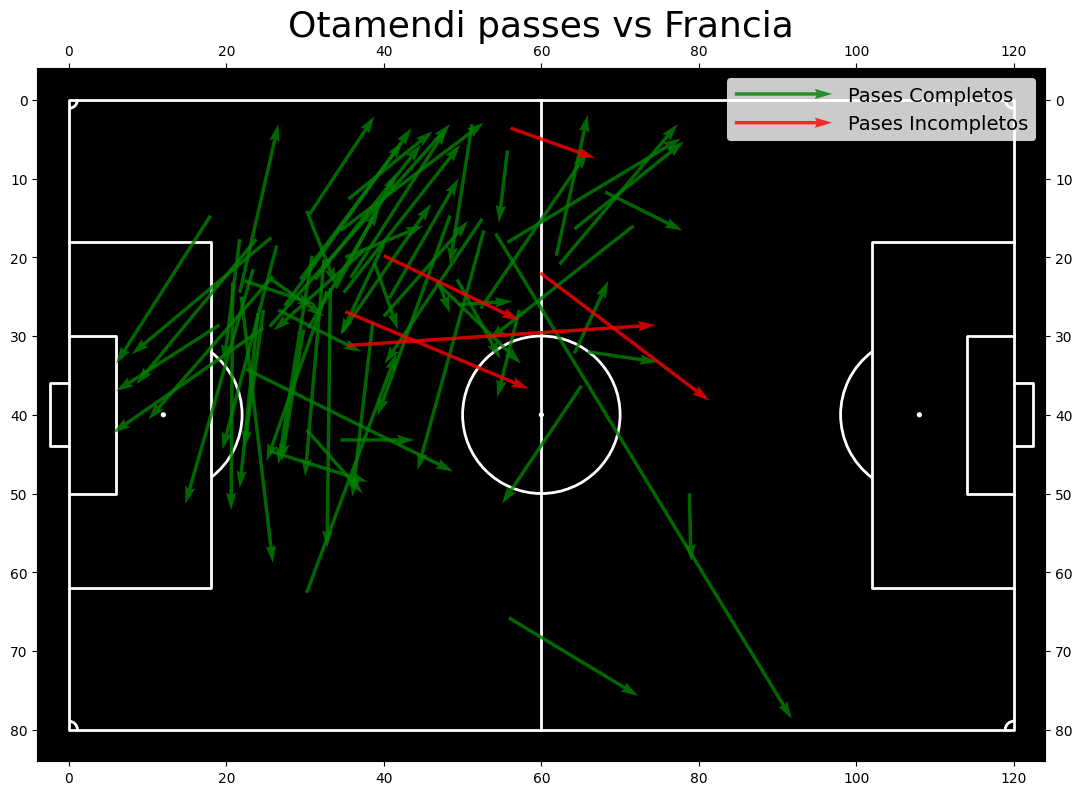

In [89]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = Pitch(
    pitch_type='statsbomb',
    axis=True,
    label=True,
    tick=True,
    goal_type='box',
    line_color='white', pitch_color='black',corner_arcs=True
)
pitch.draw(ax=ax)

pasesComp = pases[~pases['pass_outcome'] .isin( ['Incomplete', 'Pass Offside' ])]
pasesIncom = pases[pases['pass_outcome'] .isin( ['Incomplete', 'Pass Offside' ])]

pitch.arrows(pasesComp['x'], pasesComp['y'],pasesComp['end_x'],pasesComp['end_y'], ax=ax, label='Pases Completos', color='green',alpha=.8, width=2.5 )
pitch.arrows(pasesIncom['x'], pasesIncom['y'],pasesIncom['end_x'],pasesIncom['end_y'], ax=ax, label='Pases Incompletos', color='red', alpha=.8, width=2.5 )

ax.legend( handlelength=5, edgecolor='None', fontsize=14, loc='upper right')
#cambiar nombres
ax_title = ax.set_title('Otamendi passes vs Francia', fontsize=26)
